<a href="https://colab.research.google.com/github/andrepinguim/visao_computacional/blob/main/ativ_dissertativa_visao_computaional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação de libs**

In [59]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
from skimage.filters import try_all_threshold

**Exercício 01:** Ler uma imagem hospedada na Internet e exibi-la no projeto. (0,30 ponto)

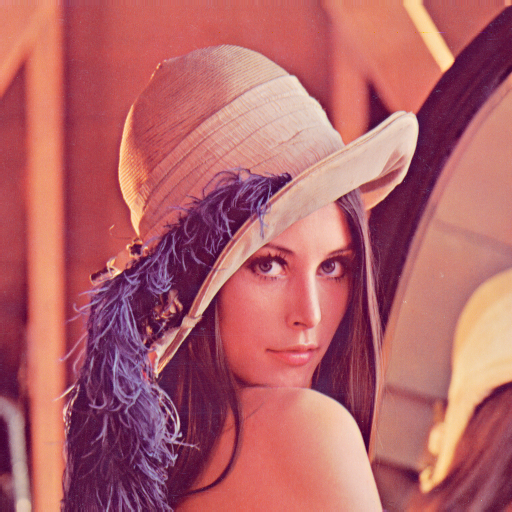

In [60]:
image = io.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png") 
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

**Exercício 02:** Exibir informações sobre a imagem, tais como Altura, Largura e Quantidade de Canais. (0,30 ponto)

In [61]:
(altura, largura, canais) = img.shape

print(f"Altura: {altura}")
print(f"Largura: {largura}")
print(f"Quantidade de Canais: {canais}")

Altura: 512
Largura: 512
Quantidade de Canais: 3


  **Exercício 03:** Redimensionar a imagem para uma resolução de 200 X 200 pixels. (0,30 ponto)

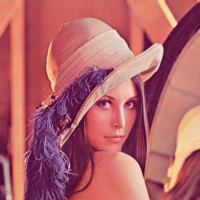

Altura: 200
Largura: 200


In [62]:
img_redim_ex3 = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)

cv2_imshow(img_redim_ex3)

print(f"Altura: {img_redim_ex3.shape[0]}")
print(f"Largura: {img_redim_ex3.shape[1]}")

**Exercício 04:** Aplicar um filtro Gaussiano na imagem do exercício 03 e exibir o resultado. (0,30 ponto)

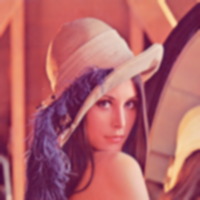

In [63]:
kernel_size = 5
img_gaussian = cv2.GaussianBlur(img_redim_ex3, (kernel_size, kernel_size), 0)
cv2_imshow(img_gaussian)

**Exercício 05:** Aplicar uma limiarização na imagem do exercício 03 e exibir o resultado. (0,30 ponto)

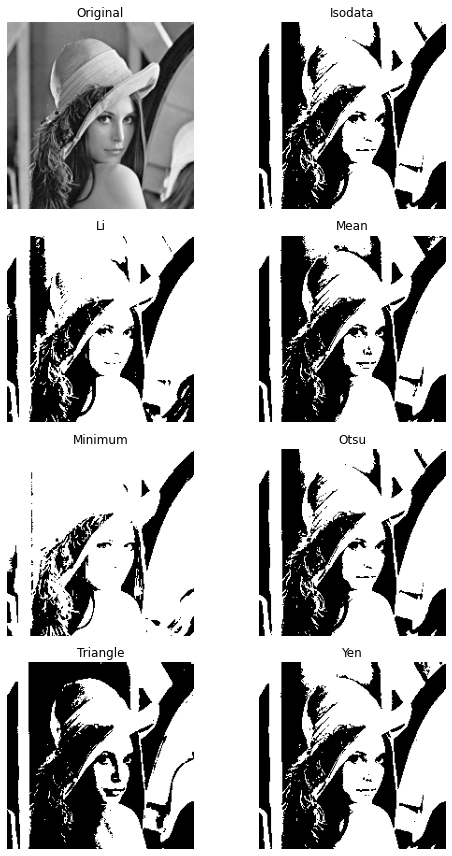

In [67]:
# testamos todos os métodos de limiarização para escolher o mais adequado
img_gray = cv2.cvtColor(img_redim_ex3, cv2.COLOR_BGR2GRAY)
fig, ax = try_all_threshold(img_gray, figsize=(8, 12), verbose=False)

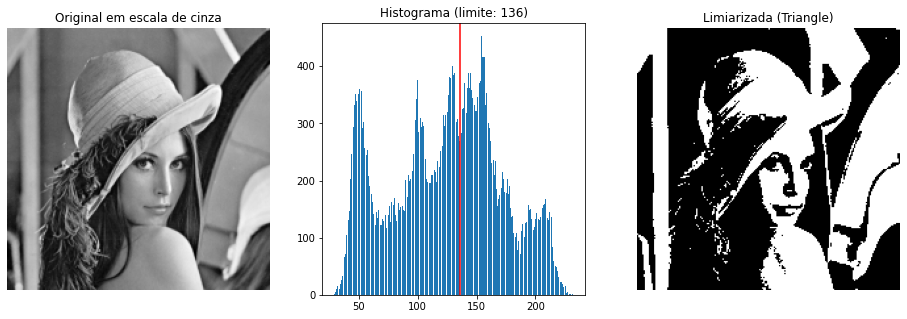

In [72]:
# aplicamos o método Triangle baseado na análise dos resultados restornados pela função try_all_threshold acima
from skimage.filters import threshold_triangle

thresh = threshold_triangle(img_gray)
binary = img_gray > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_gray, cmap=plt.cm.gray)
ax[0].set_title('Original em escala de cinza')
ax[0].axis('off')

ax[1].hist(img_gray.ravel(), bins=256)
ax[1].set_title(f'Histograma (limite: {thresh})')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Limiarizada (Triangle)')
ax[2].axis('off')

plt.show()